In [1]:
import jupman
jupman.init()


# Midterm simulation



## Slides

The slides of the introduction can be found here: [Intro](docs/midtermsim.pdf)

## The problems

**Please write three different python scripts, one for each problem**.

### Problem 1

The file [biogrid-interactors.tsv](midterm/biogrid-interactors.tsv) has 5 columns separated by a tab (\t): 

```
Interaction	InteractorA	InteractorB	TaxidA	TaxidB 
```
An example with the header follows:
```
Interaction	InteractorA	InteractorB	TaxidA	TaxidB
499073	entrez:8945	entrez:155945	9606	11676
```

Each line of the file describes an interaction, the first data line reports interaction ```499073``` involving interactors ```entrez:8945``` (belonging to organism  ```9606```) and ```entrez:1559455``` (belonging to organism ```11676```).

Write the following functions:

1. ```loadData(filename)``` that loads the data and returns a dictionary with the number of interactions for each organism. Remember to skip the first line.
**Note: an interaction where TaxidA is different from TaxidB, will increase the count of both organisms, while if TaxidA and TaxidB are the same organism the interaction will increase the count by one).**

2. ```printData(interDict, minCount)``` that gets the dictionary created by ```loadData``` and: 
    
    a. prints the organisms having a number of interactions > of ```minCount```;
    
    b. prints the total number of organisms present and the average number of interactions per organism;
    
Calling 
```
myDict = loadData(myfile)
printData(myDict,2000)
``` 

should print:
```
Organisms with more than 2000 interactions:
Taxid: 316407 	 interactions: 171101
Taxid: 10116 	 interactions: 5561
Taxid: 9606 	 interactions: 329889
Taxid: 6239 	 interactions: 8662
Taxid: 284812 	 interactions: 70451
Taxid: 7227 	 interactions: 48591
Taxid: 36329 	 interactions: 2543
Taxid: 559292 	 interactions: 673581
Taxid: 10090 	 interactions: 38748
Taxid: 3702 	 interactions: 42591
Total number of organisms: 61
Avg interactions x organism: 22928.59
```


In [72]:
"""exercise1.py"""

def loadData(filename):
    """
    reads the interaction .tsv file : filename
    returns a dictionary with the interactions per organism
    """
    retDict = dict()
    with open(filename) as inF:
        for inter in inF:
            if(not inter.startswith("Interaction")):
                inter = inter.strip("\n")
                data = inter.split("\t")
                taxA = data[-2]
                taxB = data[-1]
                #if organisms are not present add them.
                if( taxA not in retDict):
                    retDict[taxA] = 0

                if( taxB not in retDict):
                    retDict[taxB] = 0
                #increment taxA 
                retDict[taxA] += 1
                #increment taxB if different from taxA
                if( taxA != taxB):
                    retDict[taxB] += 1
    return retDict

def printData(interDict, minCount):
    """
    gets the interactions dictionary interDict
    and the threshold minCount and prints:
        the organisms having > minCount interactions
        total number of organisms and avg interactions x organism        
    """
    totOrg = 0
    sumInter = 0
    print("Organisms with more than {} interactions:".format(minCount))
    for o in interDict:
        totOrg += 1
        sumInter += interDict[o]
        if(interDict[o] > minCount):
            print("Taxid:", o , "\t interactions:" , interDict[o])
    print("Total number of organisms: {}".format(totOrg))
    print("Avg interactions x organism: {:.2f}".format(sumInter/totOrg))  
    

myfile = "midterm/biogrid-interactors.tsv"
myDict = loadData(myfile)
printData(myDict,2000)


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Organisms with more than 2000 interactions:
Taxid: 316407 	 interactions: 171101
Taxid: 10116 	 interactions: 5561
Taxid: 9606 	 interactions: 329889
Taxid: 6239 	 interactions: 8662
Taxid: 284812 	 interactions: 70451
Taxid: 7227 	 interactions: 48591
Taxid: 36329 	 interactions: 2543
Taxid: 559292 	 interactions: 673581
Taxid: 10090 	 interactions: 38748
Taxid: 3702 	 interactions: 42591
Total number of organisms: 61
Avg interactions x organism: 22928.59


### Problem 2

The file [biogrid-interactions.tsv](midterm/biogrid-interactions.tsv) has 3 columns separated by a tab (\t):

```
Interaction	InteractionTypes	ConfidenceValues
```

An example with header follows:

```
Interaction	InteractionTypes	ConfidenceValues
783952	psimi:MI:0403 (colocalization)	1.0
701836	psimi:MI:0915 (physical association)	
551345	psimi:MI:0799 (additive genetic interaction defined by inequality)	3.937113975
1199912	psimi:MI:0799 (additive genetic interaction defined by inequality)	0.2259
```
Each line represents an interaction, the first data line describes interaction ```783952``` that is a ```psimi:MI:0403 (colocalization)``` and has conficence value ```1.0```. **Note that confidence values are not always present, like in the second data line.**


Write the following functions:

1. ```loadInteractions(filename)``` that loads the tab separated value file in a dictionary (hint: use ```Interaction``` as the key) and prints the total number of interactions present. Remember to skip the first line.

2. ```findByTerm(term, interDict)``` that gets the dictionary created by ```loadInteractions``` and prints the number of interactions with the keyword ```term``` in the InteractionType. 

    Ex. considering the 4 entries above, ```findByTerm("genetic", interDict)``` would print:

    ```
    2 entries have keyword "genetic" in the interactionType
    ```
    
    
Calling
```
myDict = loadInteractions(myfile)
findByTerm(myDict,"association")
findByTerm(myDict,"colocalization")
findByTerm(myDict,"interaction")
```
should give
```
Loaded 1370394 interactions
337484 entries have keyword "association" in the interactionType
44057 entries have keyword "colocalization" in the interactionType
988853 entries have keyword "interaction" in the interactionType
```

In [98]:
"""exercise2.py"""
import pandas as pd

def loadInteractions(filename):
    """
    reads the interaction .tsv file : filename
    returns a dictionary with the interaction info
    """
    retDict = dict()
    with open(filename) as inF:
        for inter in inF:
            if(not inter.startswith("Interaction")):
                inter = inter.strip("\n")
                data = inter.split("\t")
                if(data[0] not in retDict):
                    retDict[data[0]] = [data[1],data[2]]
                
    print("Loaded {} interactions".format(len(retDict)))
    return retDict

def findByTerm(interDict, term):
    """
    prints info only of those entries containing term
    """
    cnt = 0
    for el in interDict:

        if(interDict[el][0].find(term) != -1 ):
            cnt += 1
    print("{} entries have keyword \"{}\" in the interactionType".format(cnt,term))
    
    
myfile = "midterm/biogrid-interactions.tsv"
myDict = loadInteractions(myfile)
findByTerm(myDict,"association")
findByTerm(myDict,"colocalization")
findByTerm(myDict,"interaction")




Loaded 1370394 interactions
337484 entries have keyword "association" in the interactionType
44057 entries have keyword "colocalization" in the interactionType
988853 entries have keyword "interaction" in the interactionType


### Problem 3

The two tab separated files of the previous problems, [biogrid-interactors.tsv](midterm/biogrid-interactors.tsv) and [biogrid-interactions.tsv](midterm/biogrid-interactions.tsv) have a common column "Interaction".

Write a python program that loads both files and:

1. Writes the complete information (i.e. Interaction	InteractionTypes	ConfidenceValues	InteractorA	InteractorB	TaxidA	TaxidB) for the entries having ConfidenceValues > the mean ConfidenceValue to a tab separated value file. Prints the number of written entries and the mean ConfidenceValue of the global dataset;

2. Reports the average ConfidenceValues for each InteractionType and produces a boxplot of all the Confidence values;


**Hint: load the two files as pandas DataFrames and merge them on the "Interaction" column.**
**Hint1: you can use DataFrame.to_csv to write a DataFrame to a text file (choose the appropriate separator!)**

The result of this program applied to the aforementioned files is:
```
The mean ConfidenceValue is 675.49
98 entries have a ConfidenceValue > 675.49

Mean Confidence per InteractionType:

InteractionTypes
psimi:MI:0403 (colocalization)                                                0.607030
psimi:MI:0407 (direct interaction)                                            2.613836
psimi:MI:0794 (synthetic genetic interaction defined by inequality)      124005.029496
psimi:MI:0796 (suppressive genetic interaction defined by inequality)         2.319607
psimi:MI:0799 (additive genetic interaction defined by inequality)            2.516134
psimi:MI:0914 (association)                                                        NaN
psimi:MI:0915 (physical association)                                          7.945797
Name: ConfidenceValues, dtype: float64
```

The mean ConfidenceValue is 675.49
98 entries have a ConfidenceValue > 675.49

Mean Confidence per InteractionType:

InteractionTypes
psimi:MI:0403 (colocalization)                                                0.607030
psimi:MI:0407 (direct interaction)                                            2.613836
psimi:MI:0794 (synthetic genetic interaction defined by inequality)      124005.029496
psimi:MI:0796 (suppressive genetic interaction defined by inequality)         2.319607
psimi:MI:0799 (additive genetic interaction defined by inequality)            2.516134
psimi:MI:0914 (association)                                                        NaN
psimi:MI:0915 (physical association)                                          7.945797
Name: ConfidenceValues, dtype: float64

Box plot of confidence values


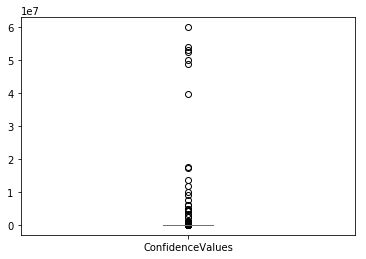

In [115]:
"""exercise3.py"""
import pandas as pd
import matplotlib.pyplot as plt

def solveExercise(interactionsFile, interactorsFile, outFile):
    interactions = pd.read_csv(interactionsFile,
                         sep="\t", header = 0)

    interactors = pd.read_csv(interactorsFile,
                         sep="\t", header = 0)

    completeData = pd.merge(interactions,interactors, on="Interaction", how="inner")
    
    avg = completeData["ConfidenceValues"].mean()
    filtered = completeData[completeData["ConfidenceValues"] > avg]

    filtered.to_csv(outFile, sep = "\t")
    print("The mean ConfidenceValue is {:0.2f}".format(avg))
    print("{} entries have a ConfidenceValue > {:0.2f}".format(len(filtered), avg))
    
    intTypes = completeData.groupby("InteractionTypes")["ConfidenceValues"].mean()

    print("\nMean Confidence per InteractionType:\n")
    print(intTypes)
    
    print("")
    print("Box plot of confidence values")
    completeData["ConfidenceValues"].plot(kind = "box")
    plt.show()
    

    
    
f1 = "midterm/biogrid-interactions.tsv"
f2 = "midterm/biogrid-interactors.tsv"
outF = "midterm/biogrid_filtered_interactions.tsv"

solveExercise(f1, f2, outF)

</div>